<a href="https://colab.research.google.com/github/saraallazarevic/PPPO---Detekcija-pola-i-godina/blob/main/PPPO_Detekcija_pola_i_godina_Sara_Lazarevic_IT25_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DETEKCIJA POLA I GODINA**

---



## **UVOD**

Student: Sara Lazarević IT25-2017


Duboko učenje deo je šire porodice metoda mašinskog učenja bazirane na učenju reprezentacije podataka, nasuprot algoritmima koji se baziraju na listama naredbi. Duboko učenje pronašlo je ogromnu primernu na polju računarske vizije. Jedna od najvažnijih primena računarske vizije je na polju detekcije i prepoznavanja lica u security-based aplikacijama.

Za potrebe projekta, izvršeno je pretprocesiranje čitavog dataseta iz sledećih razloga:

1.   Sve slike su različitih veličina
2.   Neke od slika su u potpunosti oštećene
3.   Na pojedinim slikama se ne nalaze lica
4.   Na pojedinim slikama se ne nalaze lica
5.   Meta podaci su u .mat formatu, umesto u .csv formatu
6.   Podaci nisu pravilno balansirani (npr. ima gotovo tri puta više slika lica osoba muškog nego ženskog pola)

Zbog navedenih razloga, najpre je izvršeno filtriranje slika koje su sačuvane u odgovarajućem formatu. Nakon toga izvršena je konverziju .mat fajla sa meta podacima u .csv fajl. Na osnovu meta podataka je kasnije kreiran model čijim treniranjem i testiranjem dolazimo do konačnih rezultata detekcije pola i godina. Kako među meta podacima nije postojala informacija o emocijama, izvršena je samo detekcija pola i godina.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_" -O images.zip && rm -rf /tmp/cookies.txt

--2021-08-29 10:15:09--  https://docs.google.com/uc?export=download&confirm=y_LW&id=1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_
Resolving docs.google.com (docs.google.com)... 142.250.128.102, 142.250.128.100, 142.250.128.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.128.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-4k-docs.googleusercontent.com/docs/securesc/b61777vah41k4bu14lsmag95to8qs0k7/rqus49rme3lbgo2anf8qtl2k79ppfosk/1630232100000/06049624160957438625/03516141131517857072Z/1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_?e=download [following]
--2021-08-29 10:15:09--  https://doc-0s-4k-docs.googleusercontent.com/docs/securesc/b61777vah41k4bu14lsmag95to8qs0k7/rqus49rme3lbgo2anf8qtl2k79ppfosk/1630232100000/06049624160957438625/03516141131517857072Z/1ztlCf2S68-k4ulB05gWsxGZtbU98jIx_?e=download
Resolving doc-0s-4k-docs.googleusercontent.com (doc-0s-4k-docs.googleusercontent.com)... 173.194.195.132, 2607:f8b0:4001:c11::84
Conne


Unzip dataseta

In [3]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: wiki_crop/91/7259691_1983-04-27_2012.jpg  
  inflating: wiki_crop/91/7287691_1979-08-29_2012.jpg  
  inflating: wiki_crop/91/7294591_1987-12-25_2011.jpg  
  inflating: wiki_crop/91/731591_1964-07-17_2008.jpg  
  inflating: wiki_crop/91/739691_1956-09-20_2011.jpg  
  inflating: wiki_crop/91/741791_1917-12-18_2004.jpg  
  inflating: wiki_crop/91/743391_1954-03-15_2015.jpg  
  inflating: wiki_crop/91/7464891_1984-09-30_2013.jpg  
  inflating: wiki_crop/91/7534191_1983-04-17_2010.jpg  
  inflating: wiki_crop/91/763791_1934-12-30_1990.jpg  
  inflating: wiki_crop/91/7671891_1987-03-02_2006.jpg  
  inflating: wiki_crop/91/7711491_1982-12-06_2014.jpg  
  inflating: wiki_crop/91/77491_1916-04-05_1948.jpg  
  inflating: wiki_crop/91/779591_1953-03-01_2014.jpg  
  inflating: wiki_crop/91/7798491_1947-01-25_2013.jpg  
 extracting: wiki_crop/91/783791_1917-06-18_1967.jpg  
  inflating: wiki_crop/91/794891_1970-02-12_2011.jpg  
  infla

In [4]:
#Učitavanje .mat fajla sa meta podacima
from scipy.io import loadmat

loadmat('/content/wiki_crop/wiki.mat')

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
         array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
         array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
         array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
         array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
         array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
       dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
         array(['Dettmar Cramer'], dtype='<U14'),
         array(['Marc Okrand'], dtype='<U11'), ...,
         array(['Michael Wiesinger'], dtype='<U17'),
         array(['Johann Grugger

KONVERZIJA .MAT FAJLA U .CSV

In [5]:
import numpy as np #podrška za višedimenzionalne nizove i matrice, kao i za matemetičke funkcije
from scipy.io import loadmat #podrška kako bih učitala matlab fajl
import pandas as pd #podrška za reprezentaciju i manipulaciju podacima
import datetime as date #podrška za rad sa datumima
from dateutil.relativedelta import relativedelta #podrška za računanje razlike dva datuma

#Kolone u .csv fajlu
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

wiki_mat = '/content/wiki_crop/wiki.mat'

#Učitaj .mat fajl
wiki_data = loadmat(wiki_mat)

del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

wiki_age = []

#Računa razliku u godinama između datuma rođenja osobe sa slike i datuma kada je slika napravljena
for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

#Sačuvaj meta podatke u formi DataFrame-a (~dvodimenzionalna tabela)
final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

meta = meta.sample(frac=1)

#Konverzija u .csv format
meta.to_csv('meta.csv', index=False)

time data '829-09-08' does not match format '%Y-%m-%d'
time data '1823-12-00' does not match format '%Y-%m-%d'
time data '1953-10-00' does not match format '%Y-%m-%d'
time data '1984-15-03' does not match format '%Y-%m-%d'
time data '1963-02-00' does not match format '%Y-%m-%d'
time data '1977-04-00' does not match format '%Y-%m-%d'
time data '1946-05-00' does not match format '%Y-%m-%d'
time data '647-05-15' does not match format '%Y-%m-%d'
time data '11-03-00' does not match format '%Y-%m-%d'
time data '1980-05-00' does not match format '%Y-%m-%d'
time data '1960-02-00' does not match format '%Y-%m-%d'
time data '1975-03-00' does not match format '%Y-%m-%d'
time data '1952-11-00' does not match format '%Y-%m-%d'
time data '1974-04-00' does not match format '%Y-%m-%d'
time data '1996-25-05' does not match format '%Y-%m-%d'
time data '1914-02-00' does not match format '%Y-%m-%d'


In [6]:
data = pd.read_csv('meta.csv')
data.head()

,age,gender,path
0,26,male,wiki_crop/14/1877214_1987-04-22_2014.jpg
1,68,male,wiki_crop/73/1204273_1943-10-16_2012.jpg
2,49,male,wiki_crop/13/3036913_1922-03-19_1972.jpg
3,19,male,wiki_crop/59/36626659_1993-01-28_2013.jpg
4,46,male,wiki_crop/23/43200023_1967-05-08_2014.jpg


In [7]:
data.columns

Index(['age', 'gender', 'path'], dtype='object')

In [8]:
data.shape

(40216, 3)

PRIKAZ (NE)BALANSIRANOSTI DATASETA

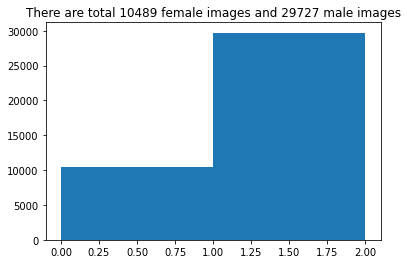

In [9]:
import matplotlib.pyplot as plt #za prikaz podataka u obliku histograma

gender = []
for g in data['gender'].values:
    if g == 'male':
        gender.append(1)
    else:
        gender.append(0)
            

plt.hist(gender, range(3))
plt.title('There are total ' + str(len(gender) - sum(gender)) + ' female images and ' + str(sum(gender)) + ' male images')
plt.show()

PRIKAZ DISTRIBUCIJE GODINA

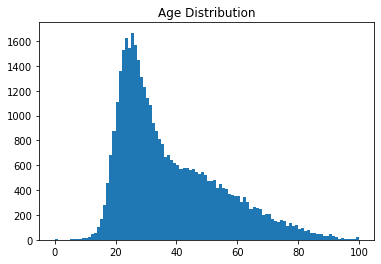

In [10]:
plt.hist(data['age'], range(101))
plt.title('Age Distribution')
plt.show()

Procesiranje slika za potrebe detekcije godina

In [11]:
import pandas as pd #podrška za reprezentaciju i manipulaciju podacima
import numpy as np #podrška za višedimenzionalne nizove i matrice, kao i za matemetičke funkcije
import cv2 #podrška za image read i write
import os  #podrška za rad sa OS
from sklearn.model_selection import train_test_split

# Učitavanje dataseta
meta = pd.read_csv('meta.csv')

# Brisanje kolone sa polom, ovde mi trebaju samo godine
meta = meta.drop(['gender'], axis=1)

# Filtriranje dataseta (godine u rasponu od 0 do 101)
meta = meta[meta['age'] >= 0]
meta = meta[meta['age'] <= 101]

# Konverzija vrednosti podataka u numpy array
meta = meta.values

# Podela dataseta na trening i testni skup (80% - 20%)
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42)

# Kreiranje svih neophodnih direktorijuma
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

# Kreiranje trening i testnog seta
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

Streaming output truncated to the last 5000 lines.
--(3033)Processing--
--(3034)Processing--
--(3035)Processing--
--(3036)Processing--
--(3037)Processing--
--(3038)Processing--
--(3039)Processing--
--(3040)Processing--
--(3041)Processing--
--(3042)Processing--
--(3043)Processing--
--(3044)Processing--
--(3045)Processing--
--(3046)Processing--
--(3047)Processing--
--(3048)Processing--
--(3049)Processing--
--(3050)Processing--
--(3051)Processing--
--(3052)Processing--
--(3053)Processing--
--(3054)Processing--
--(3055)Processing--
--(3056)Processing--
--(3057)Processing--
--(3058)Processing--
--(3059)Processing--
--(3060)Processing--
--(3061)Processing--
--(3062)Processing--
--(3063)Processing--
--(3064)Processing--
--(3065)Processing--
--(3066)Processing--
--(3067)Processing--
--(3068)Processing--
--(3069)Processing--
--(3070)Processing--
--(3071)Processing--
--(3072)Processing--
--(3073)Processing--
--(3074)Processing--
--(3075)Processing--
--(3076)Processing--
--(3077)Processing--
--(3

Procesiranje slika za potrebe detekcije pola:

In [12]:

import pandas as pd #podrška za reprezentaciju i manipulaciju podacima
import numpy as np #podrška za višedimenzionalne nizove i matrice, kao i za matemetičke funkcije
import cv2 #podrška za image read i write
import os #podrška za rad sa OS
from sklearn.model_selection import train_test_split

# Učitavanje podataka
meta = pd.read_csv('meta.csv')

# Brisanje kolone o godinama, s obzirom da tu ne treba
meta = meta.drop(['age'], axis=1)

# Podela dataseta u trening i testni skup (90% - 10%)
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

# Dataset sadrži više slika lica osoba muškog pola nego ženskog --- ovo može da dovede do problema...
# Kako bi se rešio ovaj problem, selektuje se isti broj muških i ženskih lica u trening skupu
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

extra = D_train_male[no_female:]
D_train_male = D_train_male[0:no_female]

D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

# Shuffling dataseta
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

# Kreiranje direktorijuma
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

# Ubacivanje slika u trening i test skup
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

Streaming output truncated to the last 5000 lines.
--(16388)Processing--
--(16389)Processing--
--(16390)Processing--
--(16391)Processing--
--(16392)Processing--
--(16393)Processing--
--(16394)Processing--
--(16395)Processing--
--(16396)Processing--
--(16397)Processing--
--(16398)Processing--
--(16399)Processing--
--(16400)Processing--
--(16401)Processing--
--(16402)Processing--
--(16403)Processing--
--(16404)Processing--
--(16405)Processing--
--(16406)Processing--
--(16407)Processing--
--(16408)Processing--
--(16409)Processing--
--(16410)Processing--
--(16411)Processing--
--(16412)Processing--
--(16413)Processing--
--(16414)Processing--
--(16415)Processing--
--(16416)Processing--
--(16417)Processing--
--(16418)Processing--
--(16419)Processing--
--(16420)Processing--
--(16421)Processing--
--(16422)Processing--
--(16423)Processing--
--(16424)Processing--
--(16425)Processing--
--(16426)Processing--
--(16427)Processing--
--(16428)Processing--
--(16429)Processing--
--(16430)Processing--
--(

### **Model za detekciju pola**

Keras je biblioteka visokog nivoa za programski jezik Python prvenstveno namenjeno za rad sa neuronskim mrežama. Biblioteka se oslanja u pozadini na korišćenje
drugih biblioteka kao što su TensorFlow, Theano i CNTK. Kada se biblioteka instalira, potrebno je konfigurisati koja će se biblioteka koristiti u backend-u.
Osnovna motivacija za bibliotekom je olakšavanje rada sa neuronskim mrežama i eliminisanje velikog broja tehničkih detalja koje nude biblioteke kao što je TensorFlow

Visok nivo podrazumeva da Keras pruža funkcionalnosti koje podržavaju stvaranje modela sa fokusom na ideji, a ne na konkretnoj implementaciji. 

In [13]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 3.0 MB/s 


In [14]:

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


#Model
#-----------------------------------------------------------------------------------------------------------

# Modelovanje arhitekture modela u Kerasu se zasniva na sekvenci slojeva modela!
# Prvi tip modela --> 
# Kreiranje sekvencijalnog modela, koji se definiše kao linearni niz slojeva
# Sekvencijalni model ne podržava veći broj inputa/outputa, niti međusobno povezivanje slojeva
model = Sequential()

# Drugi tip modela --> 
# Za ovaj model koristim MobileNetV2
# Koriste se imagenet težine
mobile = MobileNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

# Dodavanje mobile modela i konfigurisanje output sloja
# Dense - kompletno povezani sloj neuronske mreže, sa 2 neurona u sloju, pri čemu je tip funkcije aktivacije softmax
model.add(mobile)
model.add(Dense(units=2, activation="softmax"))

# Kompajliranje modela - konfigurisanje modela za trening, uz navođenje optimizatora
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

# Prikaz podataka o modelu...
print(model.summary())


#Data Preprocessing
#-----------------------------------------------------------------------------------------------------------

# Ovde se korsti ImageDataGenerator klasa za data augmentaciju
# Omogućava augmentaciju DOK se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

# Čitanje trening skupa
# Batch size - dimenzija podskupa treniranja
# Class_mode = categorical - 2D niz one-hot labela
train_generator = train_datagen.flow_from_directory('dataset/gender/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
# Čitanje testnog skupa
test_set = test_datagen.flow_from_directory('dataset/gender/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')


#Treniranje modela
#-----------------------------------------------------------------------------------------------------------

# Za bolje rezultate prilagodi epohe....
history1 = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=50)


#Čuvanje modela

model.save('weights/gender_mobile.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________
None
Found 18828 images belonging to 2 classes.
Found 21388 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 453s 4s/step - loss: 0.8308 - accuracy: 0.7067 - val_loss: 1.0158 - val_accuracy: 0.5725
Epoch 2/10
100/100 [==============================] - 445s 4s/step - loss: 0.6168 - accuracy: 0.7812 - val_loss: 1.1254 - val_accuracy: 0.5359
Epoch 3/10
100/100 [==============================] - 443s 4s/step - loss: 0.5517 - accuracy: 0.8021 - val_loss: 0.9512 - val_accuracy: 0.6191
Epoch 4/10
100/100 [==============================] - 452s 5s/step - loss: 0.5140 - accuracy: 0.8144 - val_loss: 0.9499 - val_accuracy: 0.6375
Epoch 5/10
100/100 [==============================] - 454s 5s/step - loss: 0.4928 - accuracy: 0.8220 - val_loss: 0.9025 - val_accuracy: 0.6631
Epoch 6/10
100/100 [==============================] - 455s 5s/step - loss: 0.4724 - accuracy: 0.8323 - val_loss: 0.9838 - val_accuracy: 0.6247
Epoch 7/10
100/100 [==============================] - 453s 5s/step - loss: 0.4326 - accuracy: 0.8464 - val_loss: 0.8710 - val_accuracy: 0.6769

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


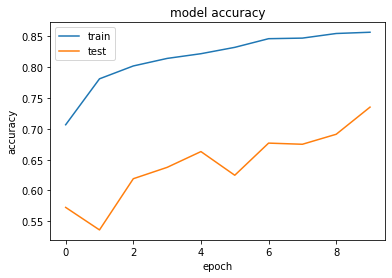

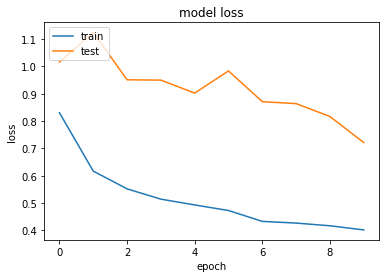

In [15]:
#Analiza performansi modela

import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

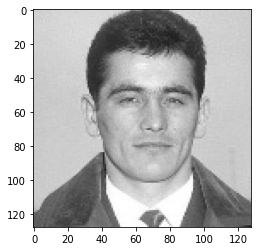

Male


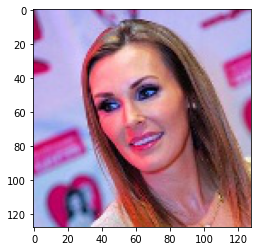

Female


In [18]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

#picture = '/content/dataset/gender/test/female/10017.jpg'
picture = '/content/dataset/gender/test/male/10001.jpg'
gender_pred = model.predict(loadImage(picture))
img = image.load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

if gender_pred[0][0]>gender_pred[0][1]:
  print('Female')
else:
  print('Male')

picture2 = '/content/dataset/gender/test/female/10079.jpg'
gender_pred2 = model.predict(loadImage(picture2))
img2 = image.load_img(picture2)                        
plt.imshow(img2)
plt.show()
max=-1
count=0

if gender_pred2[0][0]>gender_pred2[0][1]:
  print('Female')
else:
  print('Male')

### **Model za detekciju godina**

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


#Model
#------------------------------------------------------------------------------------------------------------

# Modelovanje arhitekture modela u Kerasu se zasniva na sekvenci slojeva modela!
# Prvi tip modela --> 
# Kreiranje sekvencijalnog modela, koji se definiše kao linearni niz slojeva
model2 = Sequential()

# Drugi tip modela -->
# Za ovaj model koristim MobileNetV2
# Koriste se imagenet težine
mobile = MobileNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

# Dodavanje mobile modela i konfigurisanje output sloja
# Dense - kompletno povezani sloj neuronske mreže, sa 102 neurona, pri čemu je tip funkcije aktivacije softmax
model2.add(mobile)
model2.add(Dense(units=102, activation="softmax"))

# Kompajliranje modela - konfigurisanje modela za trening, uz navođenje optimizatora
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

# Prikaz podataka o modelu
print(model2.summary())


#Data Preprocessing
#---------------------------------------------------------------------------------------------------------------

# Koristi se ImageDataGenerator za data augmentaciju 
# Omogućava augmentaciju DOK se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

# Čitanje trening skupa
train_generator = train_datagen.flow_from_directory('/content/dataset/age/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
# Čitanje testnog skupa
test_set = test_datagen.flow_from_directory('/content/dataset/age/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')


#Treniranje modela
#---------------------------------------------------------------------------------------------------------------


history2 = model2.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=25)


#Čuvanje modela

model2.save('weights/age_inception.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 102)               130662    
Total params: 2,388,646
Trainable params: 2,354,534
Non-trainable params: 34,112
_________________________________________________________________
None
Found 32129 images belonging to 102 classes.
Found 8033 images belonging to 102 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
150/150 [==============================] - 583s 4s/step - loss: 7.6976 - accuracy: 0.0206 - val_loss: 7.0313 - val_accuracy: 0.0319
Epoch 2/20
150/150 [==============================] - 573s 4s/step - loss: 6.4104 - accuracy: 0.0263 - val_loss: 6.7231 - val_accuracy: 0.0319
Epoch 3/20
150/150 [==============================] - 583s 4s/step - loss: 5.9452 - accuracy: 0.0321 - val_loss: 6.4786 - val_accuracy: 0.0256
Epoch 4/20
150/150 [==============================] - 593s 4s/step - loss: 5.6339 - accuracy: 0.0355 - val_loss: 6.1928 - val_accuracy: 0.0288
Epoch 5/20
150/150 [==============================] - 588s 4s/step - loss: 5.3008 - accuracy: 0.0385 - val_loss: 5.9773 - val_accuracy: 0.0312
Epoch 6/20
150/150 [==============================] - 584s 4s/step - loss: 5.0490 - accuracy: 0.0380 - val_loss: 5.8301 - val_accuracy: 0.0325
Epoch 7/20
150/150 [==============================] - 590s 4s/step - loss: 4.8237 - accuracy: 0.0403 - val_loss: 5.6749 - val_accuracy: 0.0338

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


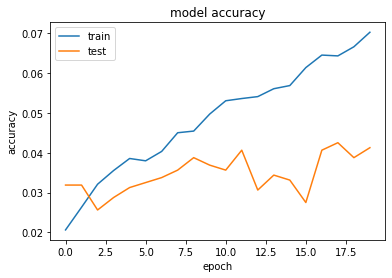

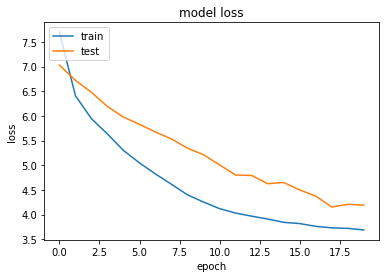

In [17]:
#Analiza performansi modela

import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

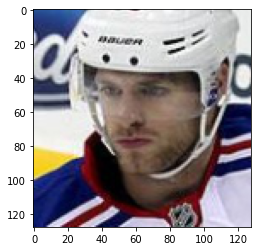

In [29]:
#TESTIRANJE


from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img


picture = '/content/dataset/age/test/20/1128.jpg'  
age_pred= model2.predict(loadImage(picture))
img = image.load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

#Zbog malog broja epoha, perfomanse su lošije i rezultat dobijen testiranjem nije precizan

if temp==0:
  print('0-24 yrs old')
if temp==1:
  print('25-49 yrs old')
if temp==2:
  print('50-74 yrs old')
if temp==3:
  print('75-99 yrs old')
if temp==4:
  print('91-101 yrs old')

### **ZAKLJUČAK**

Rad na ovom projektu predstavlja još jedno iskustvo u oblasti Deep Learning-a. Projekat je imao svoje izazove koji su uspešno prevaziđeni i projekat je uspešno priveden kraju. Mrežu je moguće usavršiti kako bi uspešnije detektovala godine izvršavanjem dodatnog treninga same mreže.